# Correlation in Python

## Import packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # adjusts tge cinfigauration of the plots we will create

## Reading in the data

In [2]:
df = pd.read_csv('movies.csv')

In [3]:
# looking at data

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,8/22/1986,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,6/11/1986,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,5/16/1986,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,7/18/1986,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,8/1/1986,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


## Data cleaning

In [4]:
# missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [5]:
## data types for our columns

df.dtypes

budget        int64
company      object
country      object
director     object
genre        object
gross         int64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [6]:
# change data type of columns from flaot to int

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [7]:
# year data in release date and year columns should match

# take last four values from relase date and make it new year columm

df['YearCorrect'] = df['released'].astype(str).str[-4:]

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,YearCorrect
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,8/22/1986,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,6/11/1986,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,5/16/1986,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,7/18/1986,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,8/1/1986,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986


In [8]:
# sort by top grossing

df.sort_values(by = ['gross'], inplace = False, ascending = False)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,YearCorrect
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,12/18/2015,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,12/18/2009,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,12/19/1997,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,6/12/2015,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,5/4/2012,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,Zentropa International Norway,Norway,Petter N�ss,Action,547,Into the White,R,4/12/2013,104,7.2,Florian Lukas,16609,Ole Meldgaard,2012,2013
5699,0,Isle of Man Film,UK,Sheree Folkson,Comedy,542,The Decoy Bride,PG,3/9/2012,89,6.2,Kelly Macdonald,9018,Neil Jaworski,2011,2012
6066,0,Cinetel Films,USA,Steven R. Monroe,Crime,441,I Spit on Your Grave 2,R,1/19/2014,106,5.7,Jemma Dallender,21070,Neil Elman,2013,2014
2594,15000000,Daybreak,USA,George Huang,Comedy,309,Trojan War,PG-13,10/1/1997,84,5.7,Will Friedle,5034,Andy Burg,1997,1997


In [9]:
#pd.set_option('display.max_rows', None) # shows all rows

In [10]:
## duplicates -drop them

#df['company'].drop_duplicates().sort_values(ascending = False) # shows all unqiue values

# drop all among df

df = df.drop_duplicates()

## Predictions

In [11]:
# predictions
# budget high correlation 
# Comapny name high correlation

<AxesSubplot:>

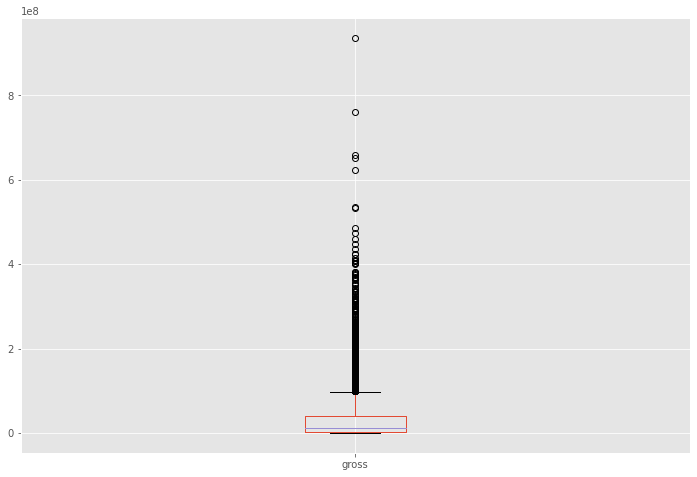

In [12]:
# gross outliers

df.boxplot(column=['gross'])

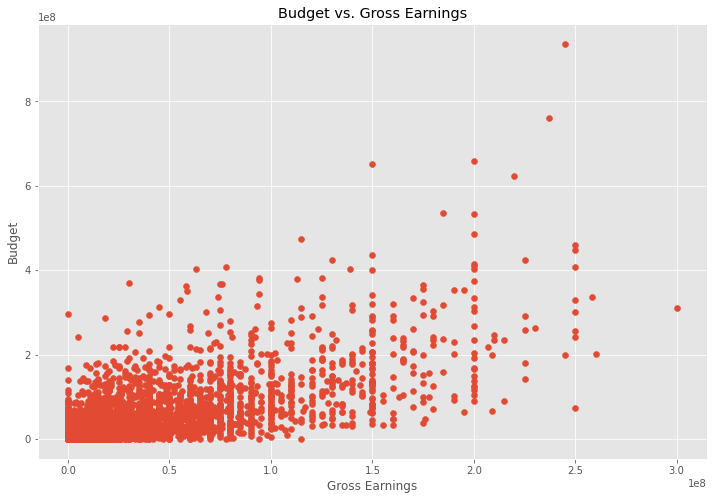

In [13]:
# scatter plot of budget vs gross revune

plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs. Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

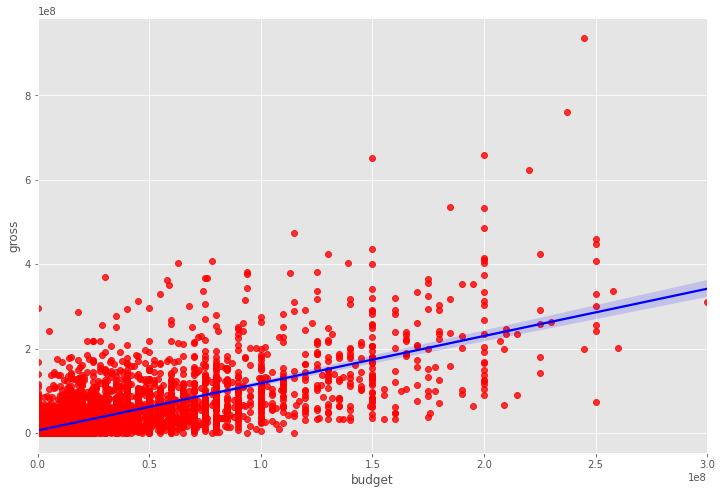

In [14]:
## Regression plot with seaborn

sns.regplot(x = 'budget', y= 'gross', data= df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [15]:
# correlation numbers

df.corr() # only works on numerical fields

# methods, example: df.corr(method = 'kendall')
    # pearson, kendall, spearman

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


In [16]:
# high correlation between budget and gross

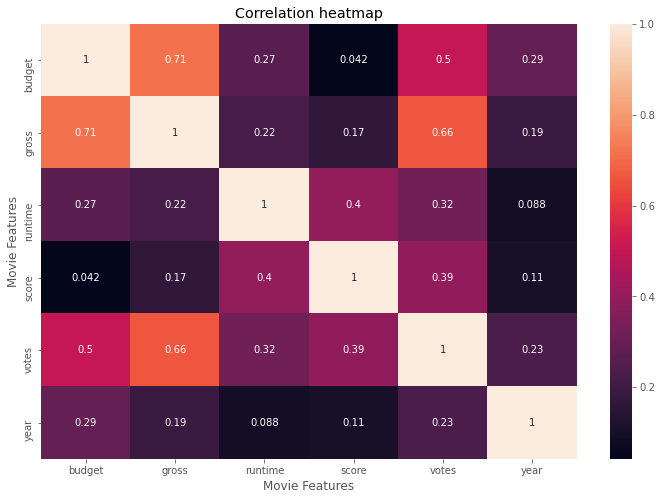

In [17]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation heatmap')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [18]:
# trying to assign each comapny a number, 
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes # cat.codes is the key
        
df_numerized

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,YearCorrect
0,8000000,665,54,2192,1,52287414,4661,8,2082,89,8.1,2454,299174,3716,1986,15
1,6000000,1680,54,1296,4,70136369,1821,7,1584,103,7.8,1605,264740,1970,1986,15
2,15000000,1680,54,2645,0,179800601,6203,6,1409,110,6.9,2345,236909,1852,1986,15
3,18500000,2062,54,1066,0,85160248,295,8,1836,137,8.4,2192,540152,1629,1986,15
4,9000000,2122,54,2123,1,18564613,1872,6,1983,90,6.9,1139,36636,2549,1986,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,1013,53,1623,4,4750497,230,8,1876,91,5.4,1066,9161,1800,2016,47
6816,0,1914,54,1989,6,28368,3430,7,1550,90,4.9,2146,1959,3008,2016,47
6817,3500000,2124,54,2313,2,3775000,577,8,1897,76,6.5,1355,36333,450,2016,47
6818,0,415,54,1914,6,25981,5272,8,647,76,6.2,1370,6947,2946,2016,47


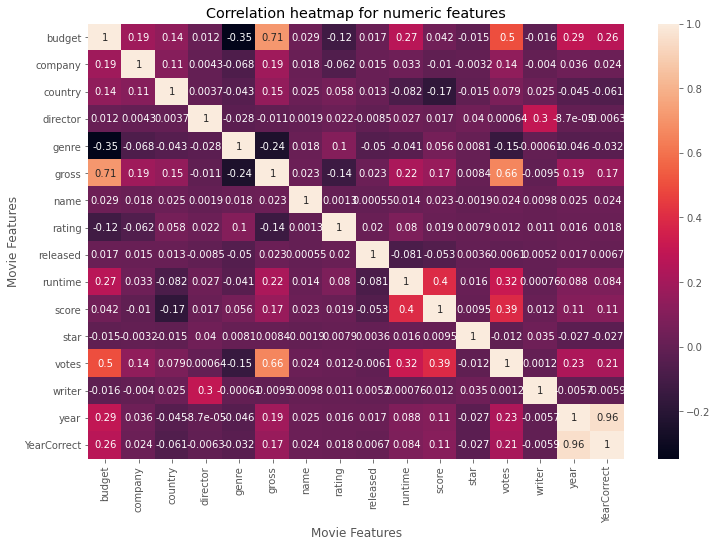

In [21]:
correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation heatmap for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [22]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()
corr_pairs

budget       budget         1.000000
             company        0.187205
             country        0.137635
             director       0.011602
             genre         -0.346794
                              ...   
YearCorrect  star          -0.026774
             votes          0.212016
             writer        -0.005950
             year           0.955777
             YearCorrect    1.000000
Length: 256, dtype: float64

In [27]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget       genre         -0.346794
genre        budget        -0.346794
             gross         -0.242676
gross        genre         -0.242676
country      score         -0.174414
                              ...   
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
YearCorrect  YearCorrect    1.000000
Length: 256, dtype: float64

In [28]:
high_corr = sorted_pairs[(sorted_pairs) >.5]
high_corr

votes        budget         0.503924
budget       votes          0.503924
gross        votes          0.662457
votes        gross          0.662457
gross        budget         0.712196
budget       gross          0.712196
YearCorrect  year           0.955777
year         YearCorrect    0.955777
budget       budget         1.000000
writer       writer         1.000000
votes        votes          1.000000
star         star           1.000000
score        score          1.000000
runtime      runtime        1.000000
released     released       1.000000
rating       rating         1.000000
name         name           1.000000
gross        gross          1.000000
genre        genre          1.000000
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
YearCorrect  YearCorrect    1.000000
dtype: float64

In [ ]:
# votes and budget have the highest correaltion to gross earnings

# comapny ahs low correlation